# Data Visualization and Some basic one-hot-encode

Dataset:
[https://www.kaggle.com/blastchar/telco-customer-churn#WA_Fn-UseC_-Telco-Customer-Churn.csv

Library for use:
Pandas, matplotlib, seaborn, plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# please import as much as you need

In [5]:
# read your data

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nUnique values :  \n",df.nunique())
print ("\nMissing values :  ", df.isnull().sum().values.sum())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Missing values :   0


In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [13]:
df = df.loc[~df['TotalCharges'].str.contains(' ')]

In [14]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

<Axes: xlabel='PaymentMethod'>

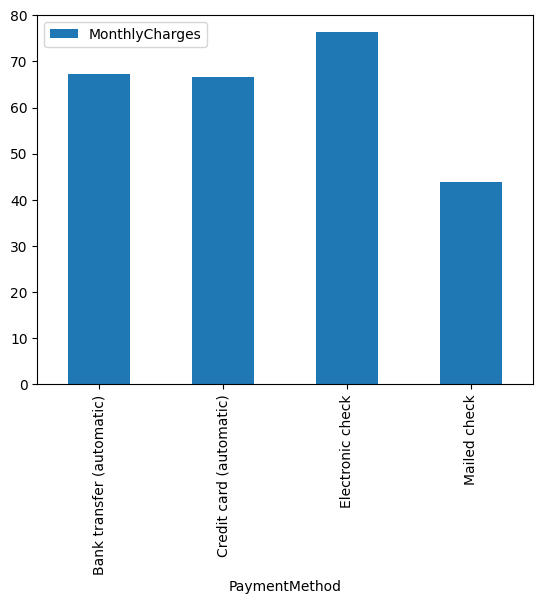

In [15]:
df2=df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()
df2.plot(x='PaymentMethod',y='MonthlyCharges',kind='bar')

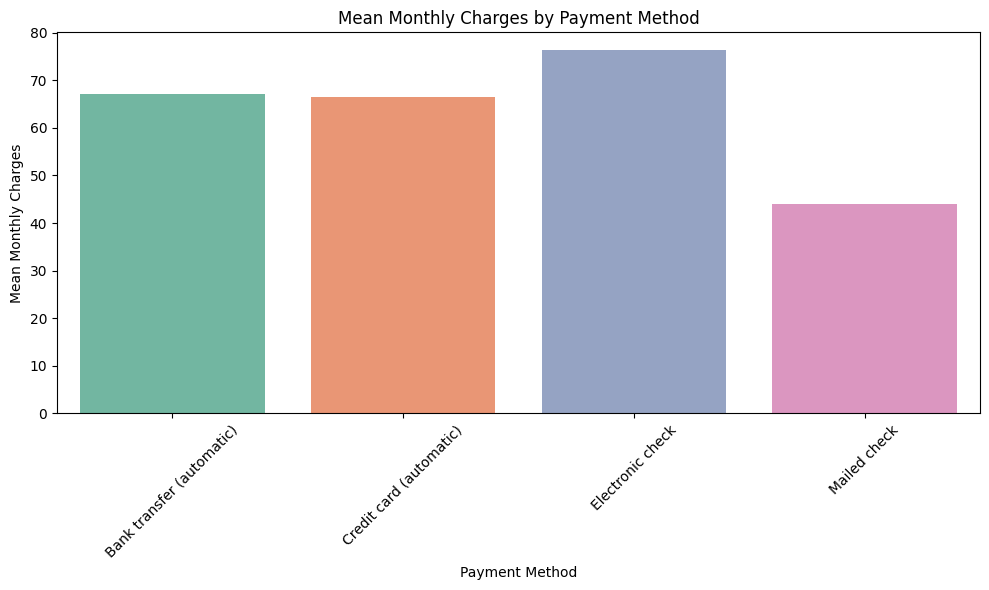

In [16]:
##improved code

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean of MonthlyCharges grouped by PaymentMethod
df_mean = df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size

# Use Seaborn's barplot function
sns.barplot(data=df_mean, x='PaymentMethod', y='MonthlyCharges', palette='Set2')

# Set labels and title
plt.xlabel('Payment Method')
plt.ylabel('Mean Monthly Charges')
plt.title('Mean Monthly Charges by Payment Method')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [18]:
#using plotly for more interactive

import plotly.express as px

# Calculate the mean of MonthlyCharges grouped by PaymentMethod
df_mean = df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(df_mean, x='PaymentMethod', y='MonthlyCharges',
             labels={'PaymentMethod': 'Payment Method', 'MonthlyCharges': 'Mean Monthly Charges'},
             title='Mean Monthly Charges by Payment Method',
             color='PaymentMethod')

# Adjust layout and display the plot in the browser
fig.update_layout(
    xaxis={'title': 'Payment Method'},
    yaxis={'title': 'Mean Monthly Charges'},
    xaxis_tickangle=-45,
    width=800,
    height=500
)

fig.show(renderer='browser')


In [19]:
# your code goes here!
import numpy as np
batas=[0,21,40,100]
kategori=['low_tenure','medium_tenure','high_tenure']
df['tenure_group']=pd.cut(df['tenure'],bins=batas,labels=kategori)

#np.where(consumption_energy > 400, 'high', (np.where(consumption_energy < 200, 'low', 'medium')))

<Axes: xlabel='tenure_group'>

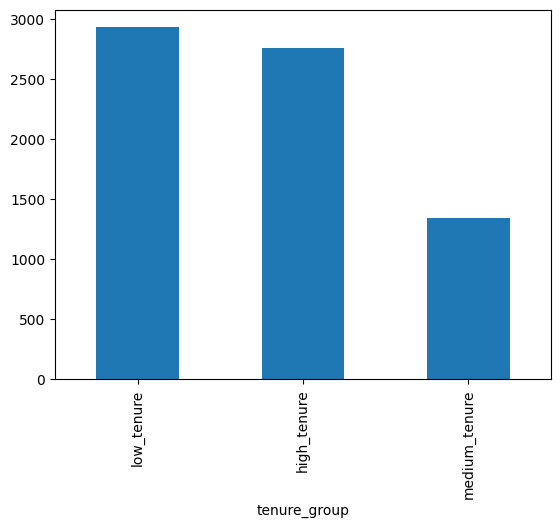

In [20]:
pd.value_counts(df['tenure_group']).plot.bar()

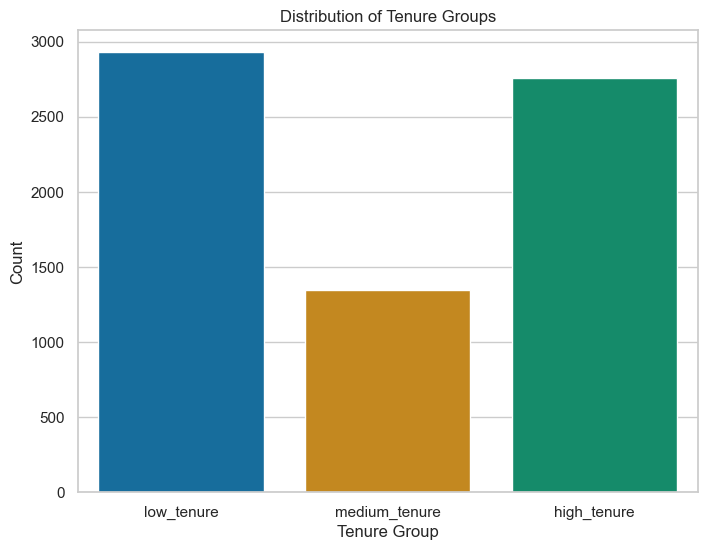

In [21]:
##improved code

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create the count plot
sns.countplot(data=df, x='tenure_group', palette='colorblind')

# Set labels and title
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.title('Distribution of Tenure Groups')

# Show plot
plt.show()


<Axes: xlabel='SeniorCitizen', ylabel='count'>

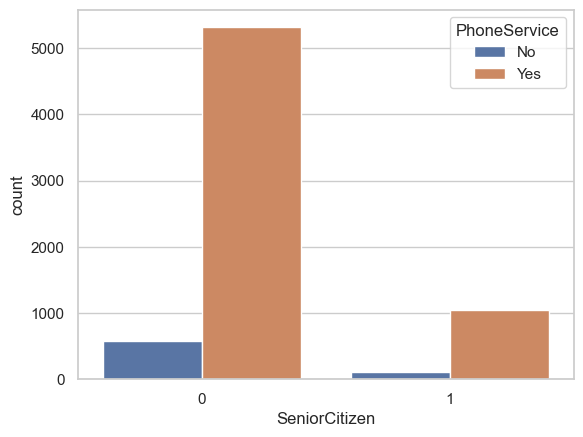

In [22]:
sns.countplot(x='SeniorCitizen',data=df,hue='PhoneService')

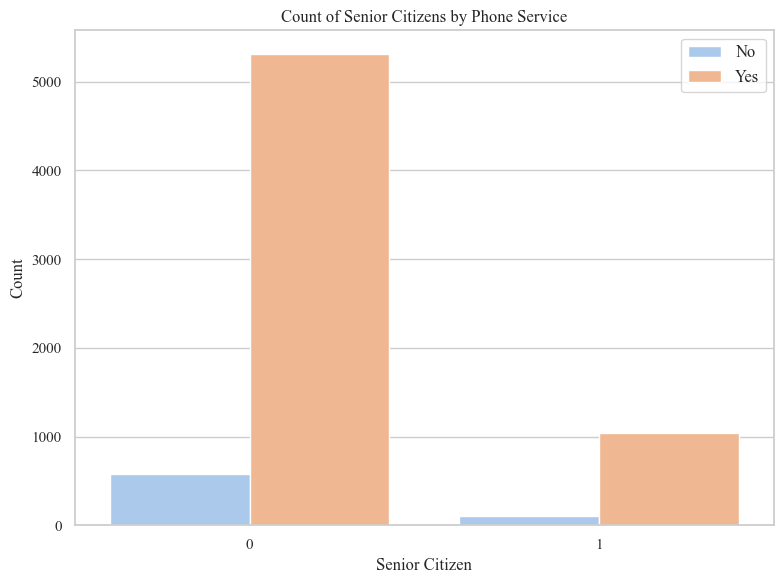

In [23]:
##improved code

import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'serif'  # Change font family
plt.rcParams['font.serif'] = 'Times New Roman'  # Change serif font
plt.rcParams['font.size'] = 12  # Change size

# Create the count plot using Seaborn
plt.figure(figsize=(8, 6))  

# Use Seaborn's countplot with different fonts
sns.countplot(x='SeniorCitizen', data=df, hue='PhoneService', palette='pastel')

# Set labels and title 
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Count of Senior Citizens by Phone Service')

# Adding legend
plt.legend(fontsize='medium', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

In [24]:
#using plotly
import plotly.express as px

# Create the count plot using Plotly Express
fig = px.histogram(df, x='SeniorCitizen', color='PhoneService', barmode='group',
                   labels={'SeniorCitizen': 'Senior Citizen', 'PhoneService': 'Phone Service', 'count': 'Count'},
                   title='Count of Senior Citizens by Phone Service')

# Update layout
fig.update_layout(
    xaxis={'title': 'Senior Citizen'},
    yaxis={'title': 'Count'},
    legend={'title': 'Phone Service', 'font': {'size': 10}},
    font=dict(family='Times New Roman', size=12),
    bargap=0.2,
    width=800,
    height=600
)

fig.show(renderer='browser')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


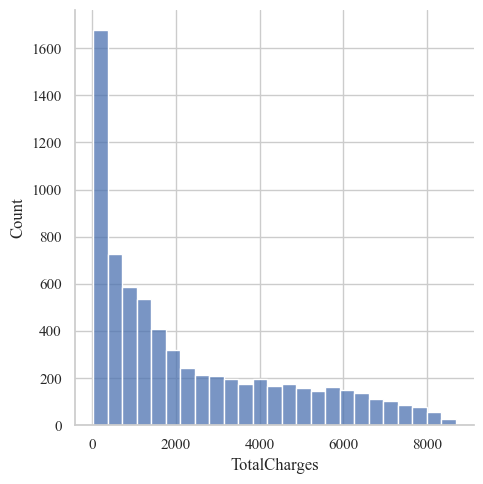

In [19]:
sns.displot(x='TotalCharges',data=df)

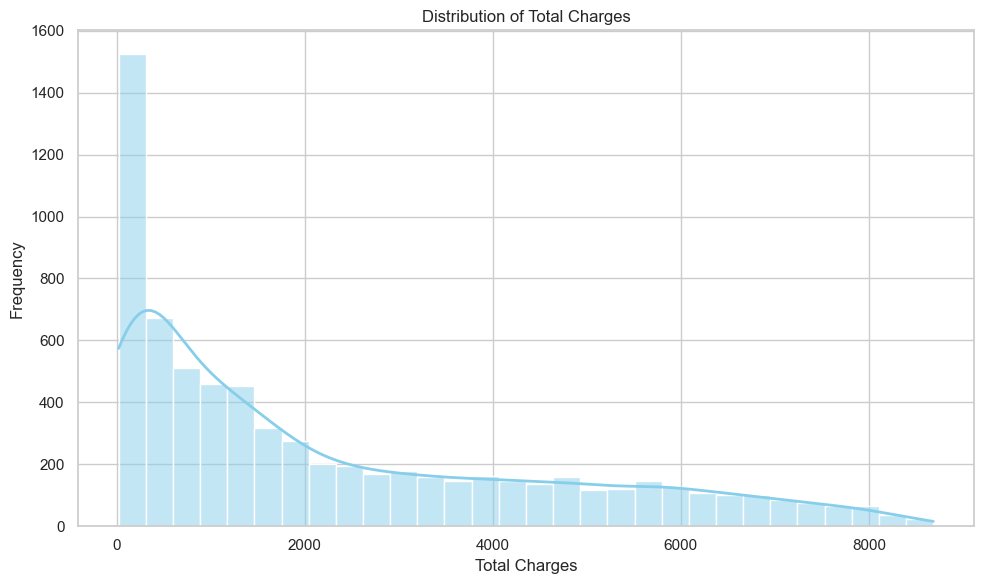

In [20]:
#more neat visualization

import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'serif'  # Change font family
plt.rcParams['font.serif'] = 'Georgia'  # Change serif font
plt.rcParams['font.size'] = 12  # Change size

# Set the style and palette for the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  

# Create the displot
sns.histplot(data=df, x='TotalCharges', kde=True, bins=30, color='skyblue', line_kws={'linewidth': 2})

# Set labels and title
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges')

# Show plot
plt.tight_layout()
plt.show()


In [29]:
#more even better visualization using plotly
import plotly.express as px

# Create the distribution plot using Plotly Express
fig = px.histogram(df, x='TotalCharges', marginal='rug',
                   labels={'TotalCharges': 'Total Charges', 'count': 'Frequency'},
                   title='Distribution of Total Charges',
                   color_discrete_sequence=['skyblue'])

# Update layout
fig.update_layout(
    xaxis={'title': 'Total Charges'},
    yaxis={'title': 'Frequency'},
    font=dict(family='Georgia', size=12),
    bargap=0.2,
    width=800,
    height=500
)

fig.show(renderer='browser')


<Axes: >

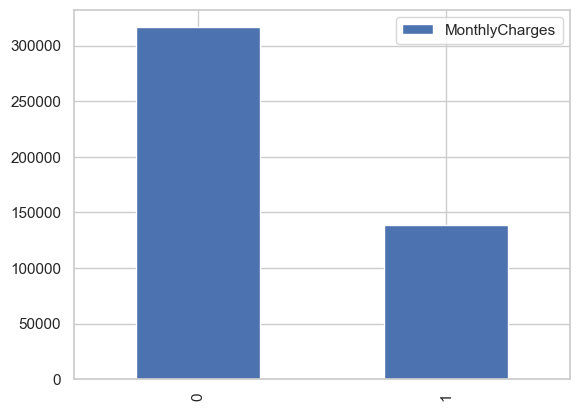

In [21]:
dfgroup = df.groupby(['Churn'])['MonthlyCharges'].sum().reset_index()
dfgroup.plot.bar()

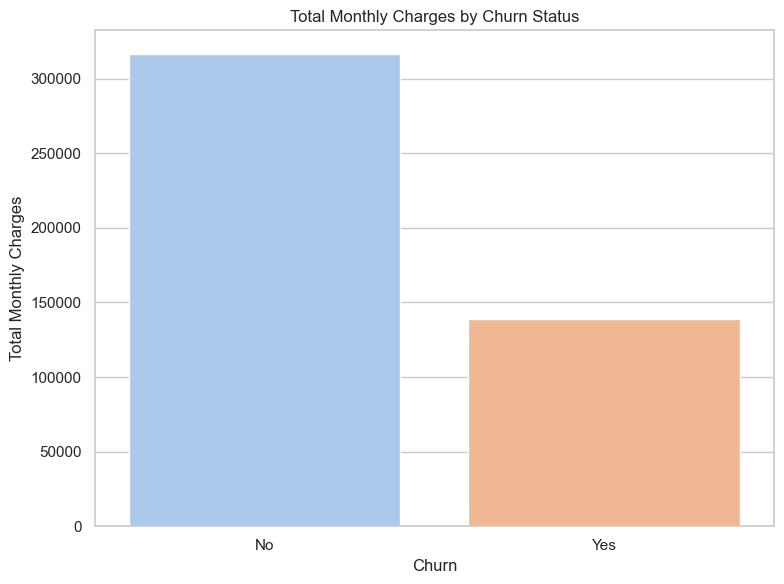

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by 'Churn' and calculating the sum of 'MonthlyCharges'
dfgroup = df.groupby(['Churn'])['MonthlyCharges'].sum().reset_index()

# Create a more visually appealing bar plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Use Seaborn's barplot for better aesthetics and customization
sns.barplot(data=dfgroup, x='Churn', y='MonthlyCharges', palette='pastel')

# Set labels and title
plt.xlabel('Churn')
plt.ylabel('Total Monthly Charges')
plt.title('Total Monthly Charges by Churn Status')

# Show plot
plt.tight_layout()
plt.show()


In [52]:
import plotly.express as px

# Grouping by 'Churn' and calculating the sum of 'MonthlyCharges'
dfgroup = df.groupby(['Churn'])['MonthlyCharges'].sum().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(dfgroup, x='Churn', y='MonthlyCharges',
             labels={'Churn': 'Churn', 'MonthlyCharges': 'Total Monthly Charges'},
             title='Total Monthly Charges by Churn Status',
             color='Churn',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Update layout
fig.update_layout(
    xaxis={'title': 'Churn'},
    yaxis={'title': 'Total Monthly Charges'},
    font=dict(family='Arial', size=12),
    width=800,
    height=500
)

fig.show(renderer='browser')


<Axes: xlabel='pd', ylabel='count'>

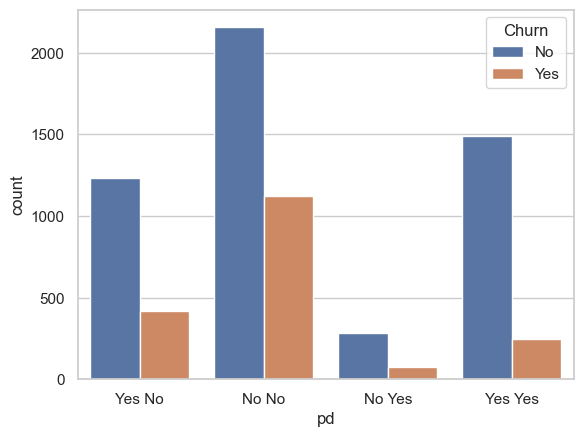

In [23]:
#Churn based Partner and Dependents factor

df['pd'] = df['Partner'] +' '+ df['Dependents']
sns.countplot(x='pd',data=df,hue='Churn')

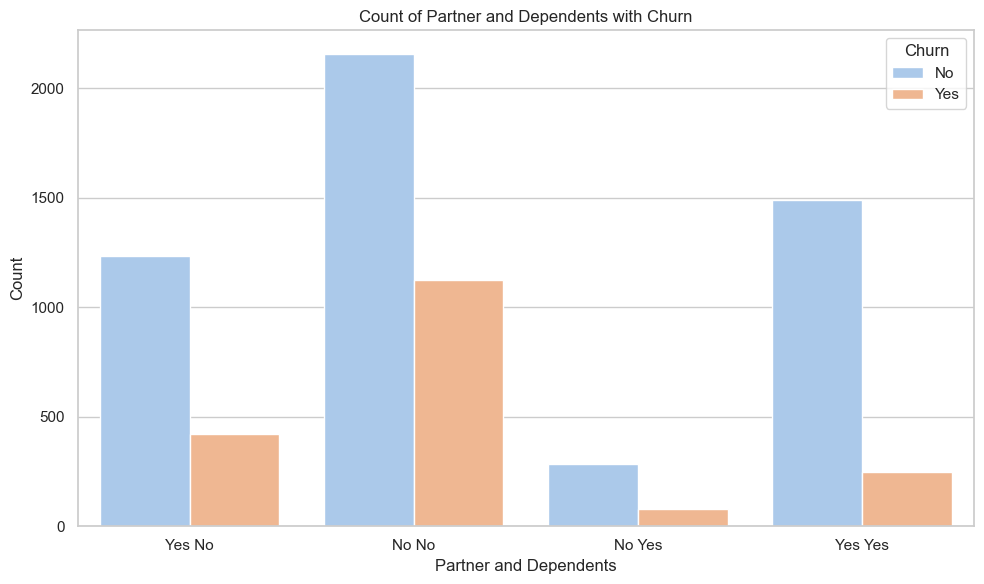

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine 'Partner' and 'Dependents' columns into a new column 'pd'
df['pd'] = df['Partner'] + ' ' + df['Dependents']

# Create a more visually appealing count plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")  # Set style to whitegrid

# Use Seaborn's countplot with the 'pastel' palette
sns.countplot(x='pd', data=df, hue='Churn', palette='pastel')

# Set labels and title
plt.xlabel('Partner and Dependents')
plt.ylabel('Count')
plt.title('Count of Partner and Dependents with Churn')

# Show plot
plt.tight_layout()
plt.show()


In [60]:
import plotly.express as px

# Combine 'Partner' and 'Dependents' columns into a new column 'pd'
df['pd'] = df['Partner'] + ' ' + df['Dependents']

# Create a count plot using Plotly Express
fig = px.histogram(df, x='pd', color='Churn', barmode='group',
                   labels={'pd': 'Partner and Dependents', 'count': 'Count'},
                   title='Count of Partner and Dependents with Churn',
                   category_orders={'pd': sorted(df['pd'].unique())},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Update layout
fig.update_layout(
    xaxis={'title': 'Partner and Dependents'},
    yaxis={'title': 'Count'},
    font=dict(family='Arial', size=12),
    bargap=0.2,
    width=800,
    height=500
)

fig.show(renderer='browser')


In [48]:
dfg = df.groupby(['PaymentMethod','Churn'])['customerID'].count().reset_index()
dfg

,PaymentMethod,Churn,customerID
0,Bank transfer (automatic),No,1284
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1289
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1296
7,Mailed check,Yes,308


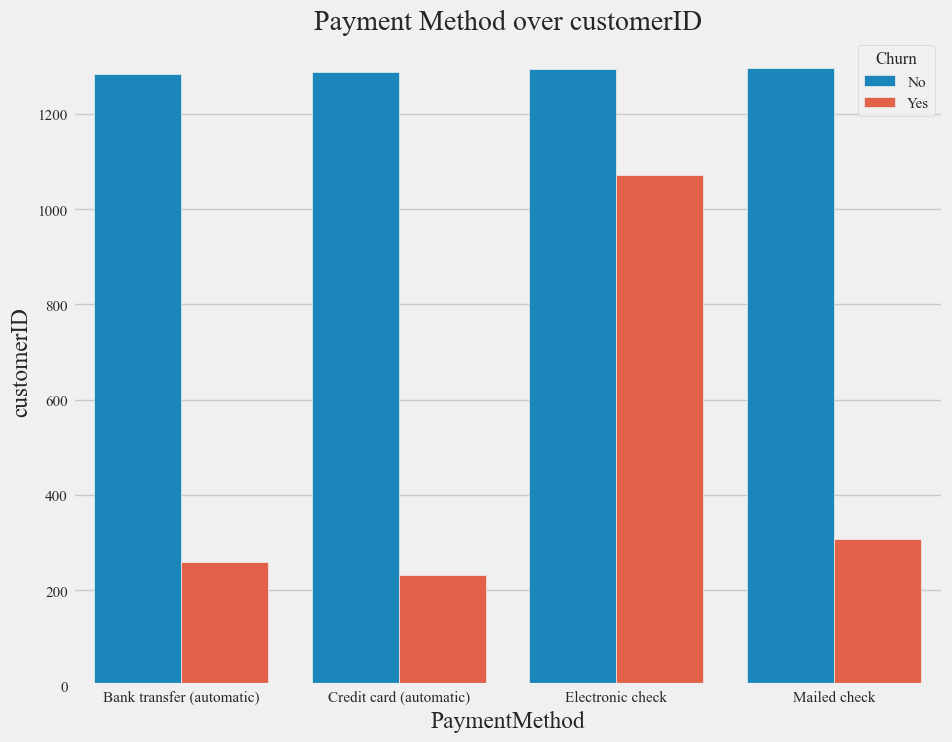

In [49]:
import matplotlib.style as style
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
style.use('fivethirtyeight')
plt.title('Payment Method over customerID')
grap=sns.barplot(x='PaymentMethod',y='customerID',data=dfg,hue='Churn')
ticks_loc = grap.get_yticks().tolist()
grap.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))



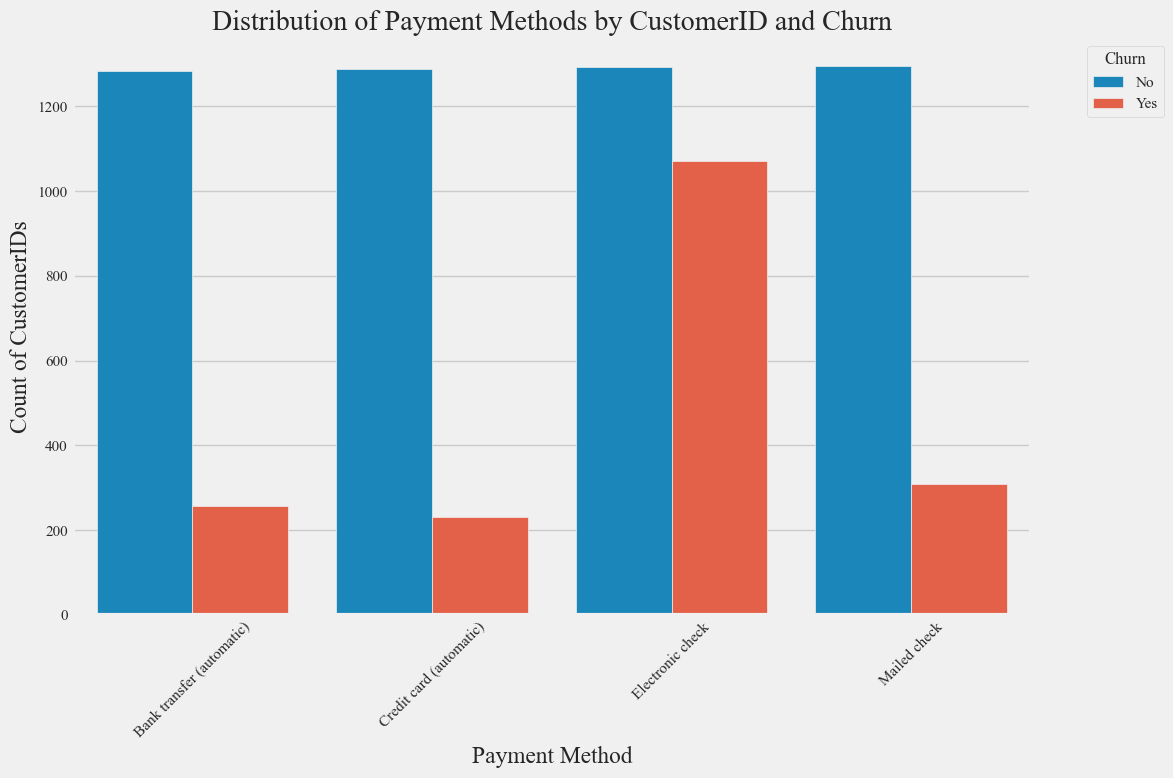

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')

# Create the bar plot using Seaborn
graph = sns.barplot(x='PaymentMethod', y='customerID', data=dfg, hue='Churn')

# Set title and labels
plt.title('Distribution of Payment Methods by CustomerID and Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count of CustomerIDs')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the legend outside the plot for better visibility
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In [65]:
import plotly.express as px

# Create a bar plot using Plotly Express with enhanced aesthetics
fig = px.bar(dfg, x='PaymentMethod', y='customerID', color='Churn',
             labels={'customerID': 'Count of CustomerIDs'},
             title='Distribution of Payment Methods by CustomerID and Churn')

# Update trace colors, opacity, and marker line color
fig.update_traces(marker=dict(line=dict(color='white', width=1)),
                  opacity=0.8)  # Adjust opacity as needed (range: 0-1)

# Update layout for improved appearance
fig.update_layout(
    xaxis={'title': 'Payment Method', 'tickangle': 45},
    yaxis={'title': 'Count of CustomerIDs'},
    font=dict(family='Arial', size=12, color='black'),
    legend={'title': 'Churn', 'bgcolor': 'rgba(0,0,0,0)', 'bordercolor': 'gray', 'borderwidth': 1},
    barmode='group',
    plot_bgcolor='white',  # Set plot background color
    width=1000,
    height=600
)

fig.show(renderer='browser')


In [28]:
df['gender'].value_counts(0)

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [29]:
df.loc[:,'gender'] = df['gender'].apply(lambda x: 0 if x=='Female' else 1)
df['gender'].value_counts(0)

gender
1    3549
0    3483
Name: count, dtype: int64

In [30]:
df.loc[:,'Partner'] = df['Partner'].apply(lambda x: 0 if x=='No' else 1)
df['Partner'].value_counts(0)

Partner
0    3639
1    3393
Name: count, dtype: int64

In [31]:
df.loc[:,'Dependents'] = df['Dependents'].apply(lambda x: 0 if x=='No' else 1)
df['Dependents'].value_counts(0)

Dependents
0    4933
1    2099
Name: count, dtype: int64

In [32]:
df.loc[:,'PhoneService'] = df['PhoneService'].apply(lambda x: 0 if x=='No' else 1)
df['PhoneService'].value_counts(0)

PhoneService
1    6352
0     680
Name: count, dtype: int64

In [33]:
df.loc[:,'PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 0 if x=='No' else 1)
df['PaperlessBilling'].value_counts(0)

PaperlessBilling
1    4168
0    2864
Name: count, dtype: int64

In [34]:
df.loc[:,'Churn'] = df['Churn'].apply(lambda x: 0 if x=='No' else 1)
df['Churn'].value_counts(0)

Churn
0    5163
1    1869
Name: count, dtype: int64

In [35]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,pd
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,low_tenure,Yes No
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,medium_tenure,No No
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,low_tenure,No No
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,high_tenure,No No
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,low_tenure,No No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,medium_tenure,Yes Yes
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0,high_tenure,Yes Yes
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,low_tenure,Yes Yes
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,low_tenure,Yes No


In [2]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Scatter plot
scatter_fig = go.Figure(data=go.Scatter(x=[1, 2, 3], y=[4, 1, 2], mode='markers'))
scatter_fig.update_layout(title='Scatter Plot', xaxis_title='X-axis', yaxis_title='Y-axis')

# Bar chart
bar_fig = go.Figure(data=go.Bar(x=['A', 'B', 'C'], y=[10, 20, 15]))
bar_fig.update_layout(title='Bar Chart', xaxis_title='Categories', yaxis_title='Values')

# Save the visualizations as HTML files
pio.write_html(scatter_fig, file='scatter_plot.html', auto_open=False)
pio.write_html(bar_fig, file='bar_chart.html', auto_open=False)

print("HTML files created for scatter plot and bar chart.")


HTML files created for scatter plot and bar chart.
